In [1]:
import cv2
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
import cv2
import numpy as np

def find_circles(image_path, resize_factor=1.0):
    img = cv2.imread(image_path)
    
    # Resize the image if a resize_factor is provided
    if resize_factor != 1.0:
        img = cv2.resize(img, None, fx=resize_factor, fy=resize_factor)
    
    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(grey, (7, 7), 0)
    
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,
        minDist=50,
        param1=50,  # Adjust as needed
        param2=30,  # Adjust as needed
        minRadius=10,
        maxRadius=50
    )
    
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]
            
            # Create a circular mask
            mask = np.zeros_like(grey)
            cv2.circle(mask, center, radius, 255, thickness=cv2.FILLED)
            
            # Find contours within the circular mask
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            
            # Calculate circularity by comparing the area of the contour to the area of the circle
            if len(contours) > 0:
                contour_area = cv2.contourArea(contours[0])
                circle_area = np.pi * radius**2
                
                # Set a circularity threshold (adjust as needed)
                circularity_threshold = 0.85
                
                if contour_area / circle_area > circularity_threshold:
                    # Draw the outer circle
                    cv2.circle(img, center, radius, (0, 255, 0), 2)
                    
                    # Draw the center of the circle
                    cv2.circle(img, center, 2, (0, 0, 255), 3)
        
        cv2.imshow('Full Circles with Bounding Boxes', img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


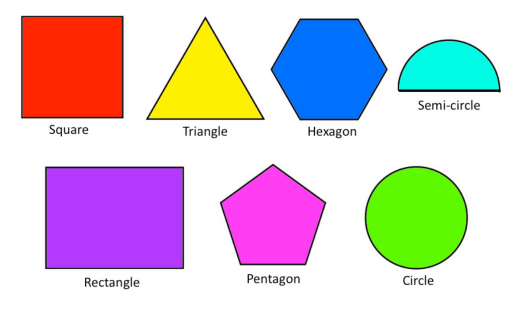

In [4]:
img = mpimg.imread(r'D:\IPCV Projects\IM\img2.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: to hide the axes
plt.show()

In [6]:
image_path = r'D:\IPCV Projects\IM\img2.jpg'
find_circles(image_path, resize_factor=0.5)